# EMERGENCY - 911 CALLS [Data Analysis]


### Emergency - 911 Dataset
In this project, we'll analyze Emergency - 911 calls data from __[Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert?resource=download)__.

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Business Objective:
Improving Emergency Response Efficiency and Resource Allocation for 911 Calls

### Objective Statement
The primary objective is to enhance the efficiency and effectiveness of emergency response services in Montgomery County by analyzing the 911 call data.
This analysis aims to identify patterns and trends in emergency calls to optimize resource allocation, reduce response times, and improve overall emergency management.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)

In [9]:
df  = pd.read_csv("data/911.csv")

In [10]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [12]:
df.shape

(663522, 9)

In [17]:
df.describe(include="all")

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,663522.000000,663522.000000,663522,583323.000000,663522,663522,663229,663522,663522.0
unique,NaN,NaN,663282,NaN,148,640754,68,41292,NaN
top,NaN,NaN,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,NaN,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,5,NaN,148372,9,55490,7285,NaN
mean,40.158162,-75.300105,NaN,19236.055791,NaN,NaN,NaN,NaN,1.0
std,0.220641,1.672884,NaN,298.222637,NaN,NaN,NaN,NaN,0.0
min,0.000000,-119.698206,NaN,1104.000000,NaN,NaN,NaN,NaN,1.0
25%,40.100344,-75.392735,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.143927,-75.305143,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.211865,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


## checking Null Values

In [20]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

# the top 5 zipcodes for 911 calls?

In [23]:
t5_zipcode = df['zip'].value_counts().head(5)
t5_zipcode

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

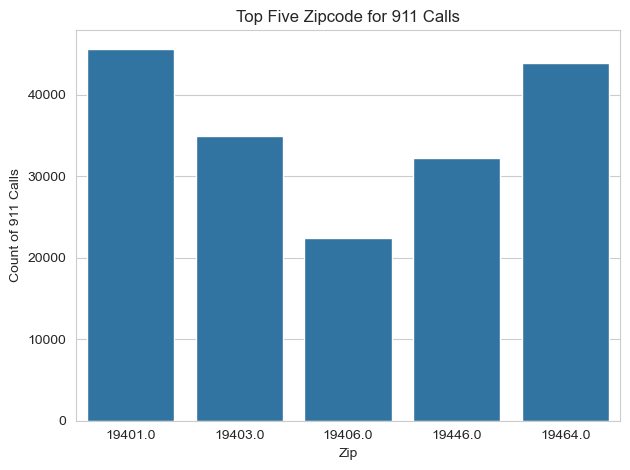

In [31]:
sns.barplot(x=t5_zipcode.index, y=t5_zipcode.values)
plt.title('Top Five Zipcode for 911 Calls')
plt.xlabel('Zip')
plt.ylabel('Count of 911 Calls')
plt.tight_layout()

# the top 5 townships (twp) for 911 calls?

In [34]:
t5_township = df['twp'].value_counts().head(5)
t5_township

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

Text(0.5, 25.52222222222222, 'Township')

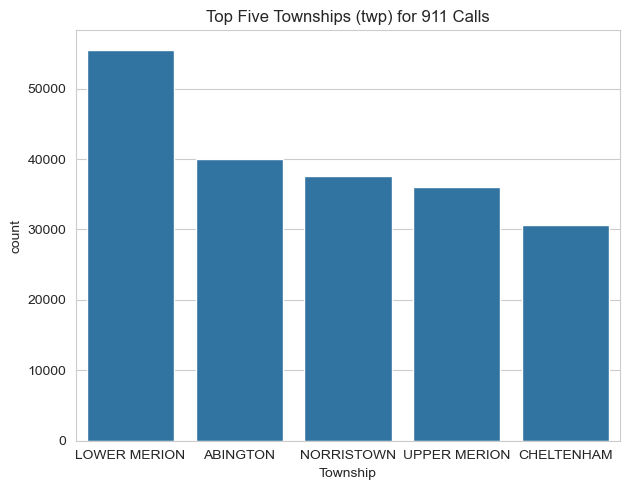

In [48]:
sns.countplot(x='twp',data=df,order=t5_township.index)
plt.tight_layout()
plt.title('Top Five Townships (twp) for 911 Calls')
plt.xlabel('Township')

#  how many unique title codes are there?

In [51]:
# data['title'].unique()   # to see all unique title name
df['title'].nunique()

148

# Creating new features

The titles column contains "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I'll use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

In [55]:
x = df['title'].iloc[0]

In [57]:
print(x, type(x))

EMS: BACK PAINS/INJURY <class 'str'>


In [59]:
df['reason'] = df['title'].apply(lambda title: title.split(":")[0])

In [61]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


##  What is the most common Reason for a 911 call based off of this new column?

In [64]:
df['reason'].value_counts()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

Text(0.5, 1.0, 'Which Problem Has Most Calls')

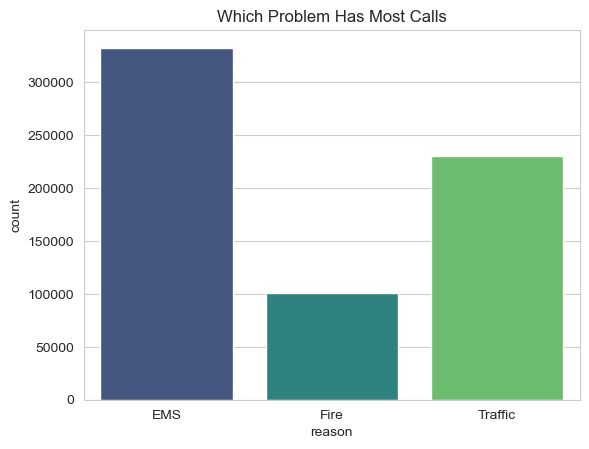

In [66]:
sns.countplot(x = "reason", data = df , palette="viridis", hue="reason")
plt.title('Which Problem Has Most Calls')

### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [69]:
type(df['timeStamp'].iloc[0])

str

 #### I'll use pd.to_datetime to convert the column from strings to DateTime objects

In [72]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [74]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   reason     663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 50.6+ MB


In [78]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [79]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


#### Notice how the Day of Week is an integer 0-6. I'll use the .map() with this dictionary to map the actual string names to the day of the week

In [83]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [85]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


### Now I use seaborn to create a countplot of the `Day of Week` column with the hue based off of the Reason column.

Text(0.5, 1.0, 'Which week days has most calls?')

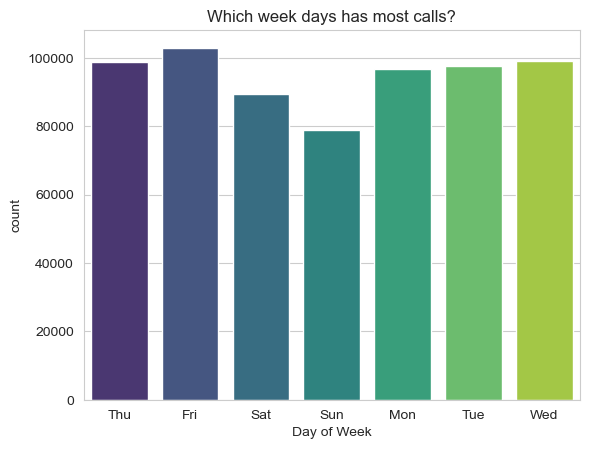

In [88]:
# Which week days has most calls?

sns.countplot(x = 'Day of Week', data = df, palette = 'viridis', hue="Day of Week")
plt.title('Which week days has most calls?')

Text(0.5, 1.0, 'Which Hour has most calls?')

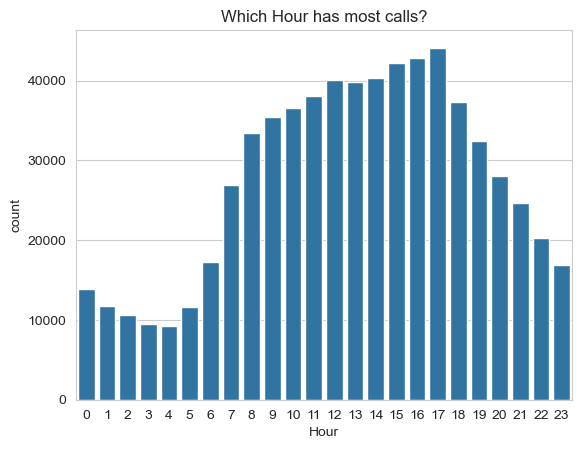

In [104]:
sns.countplot(x='Hour',data=df)
plt.title('Which Hour has most calls?')


Text(0.5, 1.0, 'Which week day has most calls for which reason?')

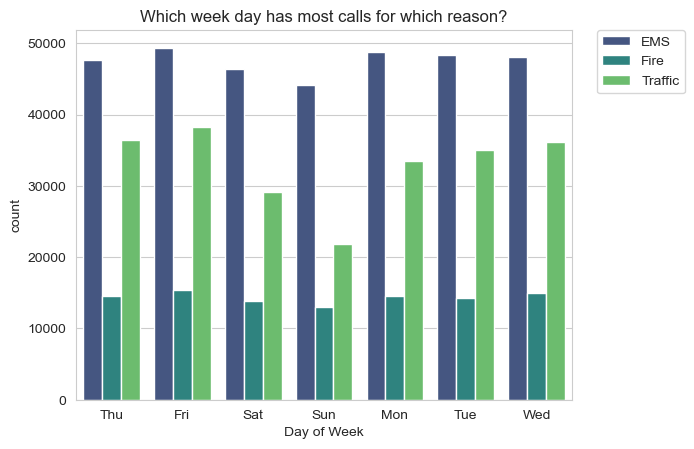

In [106]:
sns.countplot(x="Day of Week", data = df, hue = "reason", palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Which week day has most calls for which reason?')

# Now do the same for Month:

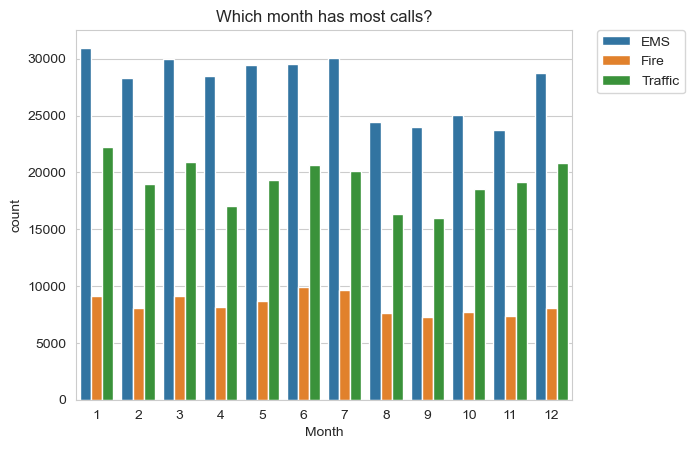

In [109]:
sns.countplot(x='Month',data=df,hue='reason')
plt.title('Which month has most calls?')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [111]:
t = df['timeStamp'].iloc[0]
# t.date
df['Date'] = df['timeStamp'].apply(lambda t:t.date())
df['Time'] = df['timeStamp'].apply(lambda t:t.time())

In [112]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10,14:39:21


In [115]:
df['Date'].value_counts()

Date
2018-03-02    2187
2018-11-15    1662
2020-06-03    1401
2018-03-07     920
2018-03-03     917
              ... 
2020-07-29     217
2020-03-29     204
2020-03-28     184
2016-05-01     136
2015-12-10     114
Name: count, Length: 1694, dtype: int64

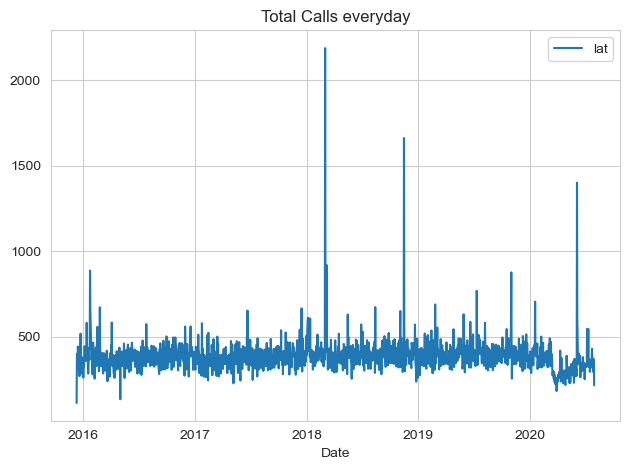

In [117]:
# Total Calls everyday

df.groupby('Date').count() [['lat']].plot()
plt.title('Total Calls everyday')
plt.tight_layout()

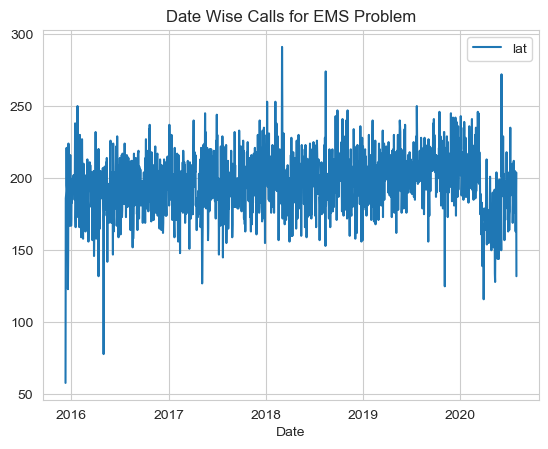

In [119]:
# Date Wise Calls for EMS Problem

df[df['reason'] == 'EMS'].groupby('Date').count() [['lat']].plot()
plt.title('Date Wise Calls for EMS Problem')
plt.tight_layout
plt.show()

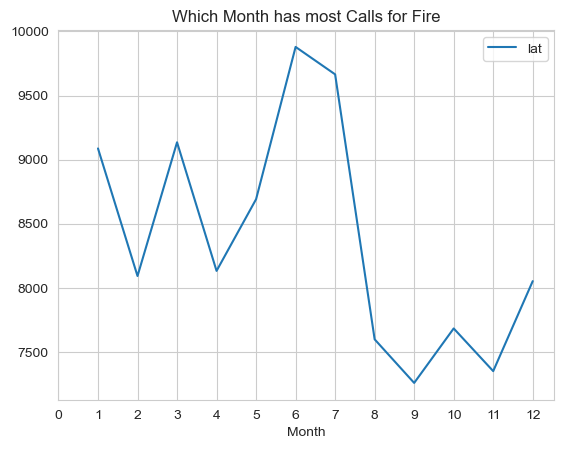

In [121]:
# Which Month has most Calls for Fire

df[df['reason'] == 'Fire'].groupby('Month').count() [['lat']].plot()
plt.title('Which Month has most Calls for Fire')
plt.xticks(range(0,13,1))
plt.tight_layout
plt.show()

# Which hour has most calls for Fire Problem

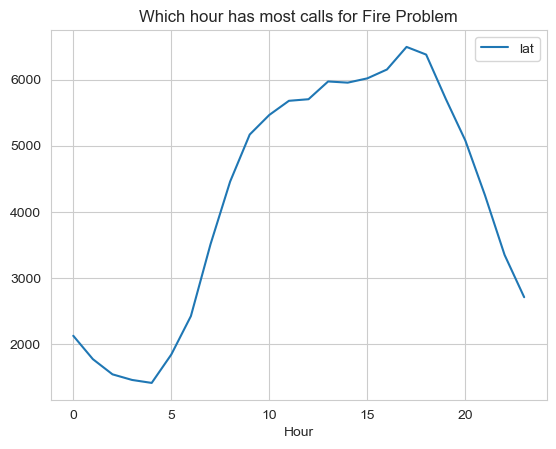

In [124]:


df[df['reason'] == 'Fire'].groupby('Hour').count() [['lat']].plot()
plt.title('Which hour has most calls for Fire Problem')
plt.tight_layout
plt.show()

# Which hour has most calls for Traffic Problem?

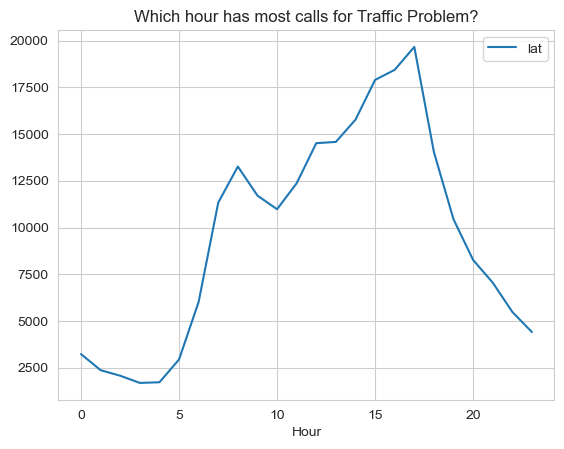

In [127]:

df[df['reason'] == 'Traffic'].groupby('Hour').count() [['lat']].plot()
plt.title('Which hour has most calls for Traffic Problem?')
plt.tight_layout
plt.show()

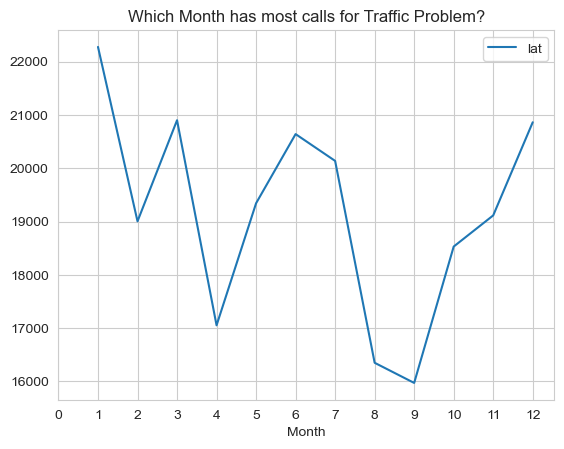

In [129]:
# Which Month has most calls for Traffic Problem?

df[df['reason'] == 'Traffic'].groupby('Month').count() [['lat']].plot()
plt.title('Which Month has most calls for Traffic Problem?')
plt.tight_layout
plt.xticks(range(0,13,1))
plt.show()

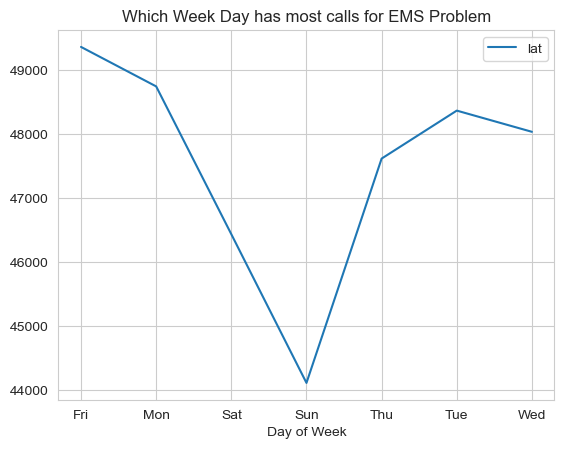

In [131]:
# Which Week Day has most calls for EMS Problem

df[df['reason'] == 'EMS'].groupby('Day of Week').count() [['lat']].plot()
plt.title('Which Week Day has most calls for EMS Problem')
plt.tight_layout
plt.show()

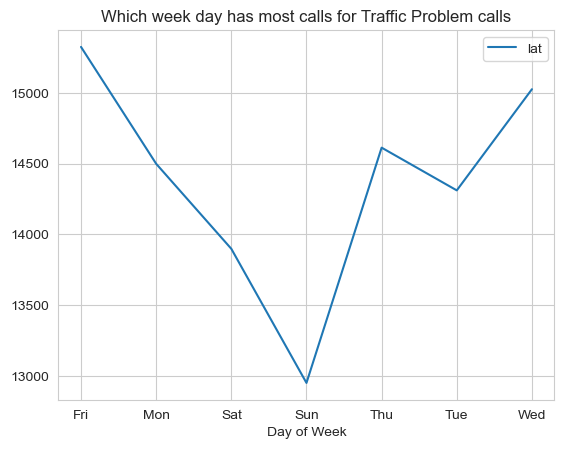

In [133]:
# Which week day has most calls for Traffic Problem calls
df[df['reason'] == 'Fire'].groupby('Day of Week').count() [['lat']].plot()
plt.title('Which week day has most calls for Traffic Problem calls')
plt.tight_layout
plt.show()

In [142]:
# Restructuring DataFrame 
# 1. Hour Become Column, 2. Day of Week become Row

# What amount of calls for on an hourly basis every day of the week?

dayhour = df.groupby(by = ['Day of Week','Hour']).count() ['reason'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,5498,5582,5795,5794,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,5367,5639,6092,5953,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


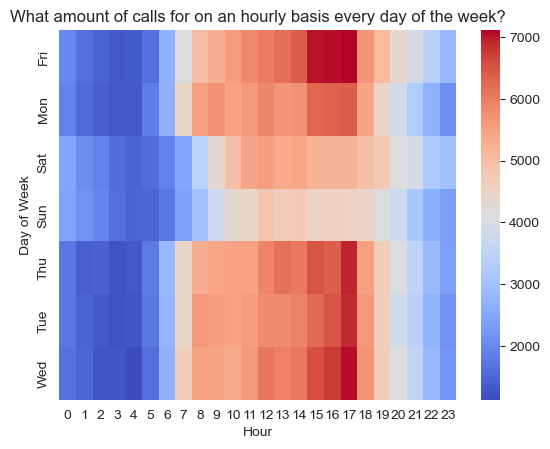

In [144]:
# Creating a heatmap using this DataFrame

sns.heatmap(dayhour ,cmap='coolwarm')
plt.title('What amount of calls for on an hourly basis every day of the week?')
plt.show()

### Now see if I can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind we may need to reset the index to a column

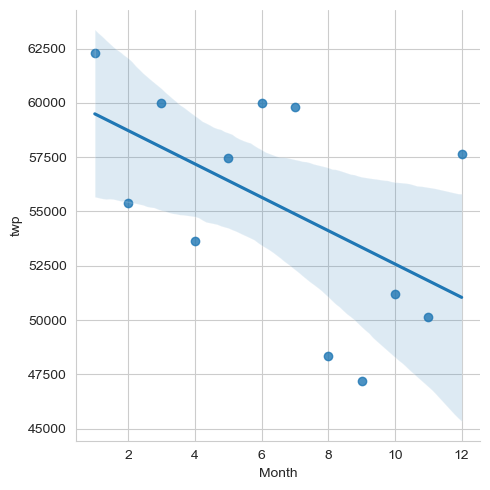

In [148]:
byMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [153]:
byMonth.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week,Date,Time
Month,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027


### The count of calls per month.

<Axes: xlabel='Month'>

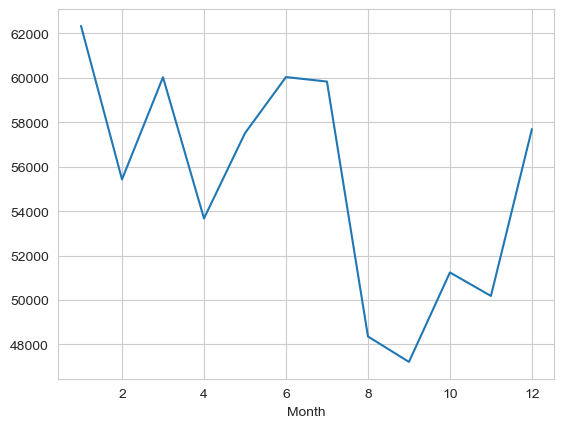

In [156]:
byMonth['lat'].plot()


C:\Users\Decimal\AppData\Local\Temp\ipykernel_11380\3280416700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data = df, palette='crest')


<Axes: xlabel='Month', ylabel='count'>

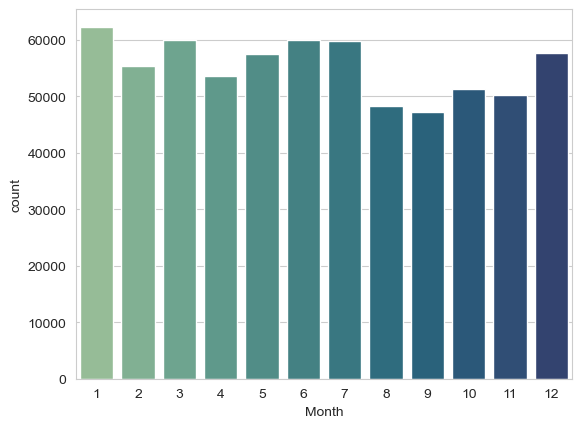

In [158]:
sns.countplot(x='Month', data = df, palette='crest')


## Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

In [163]:
df['date'] = df['timeStamp'].apply(lambda t : t.date())

In [167]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date,Time,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,17:10:52,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,17:29:21,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10,14:39:21,2015-12-10


### Using groupby on the Date column with the count() aggregate and create a plot of counts of 911 calls.

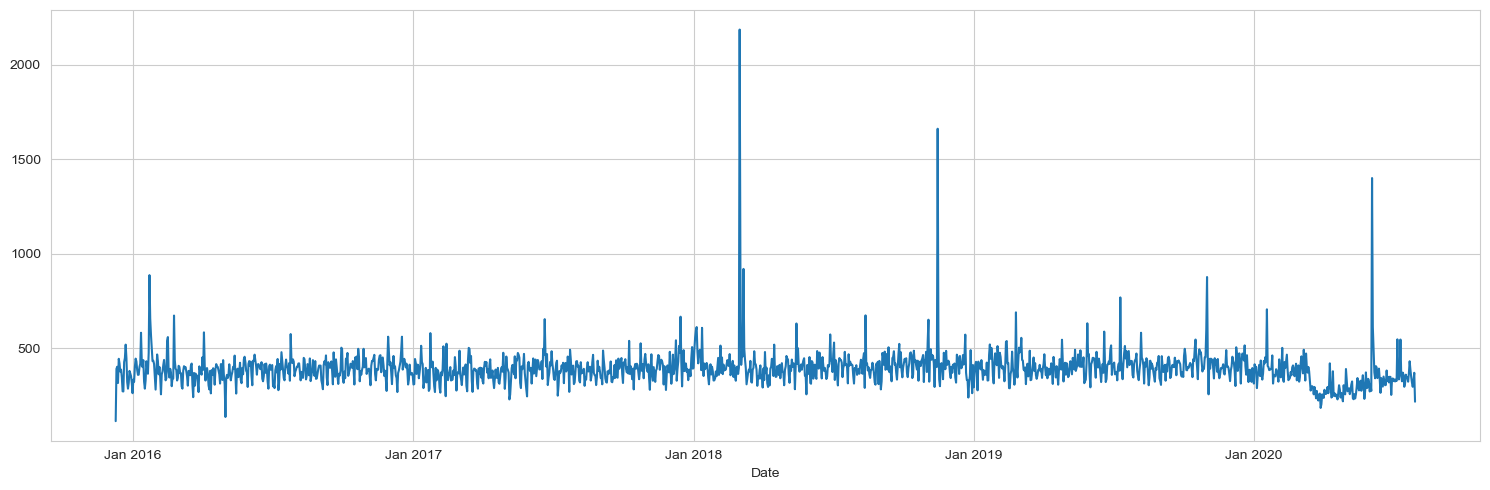

In [172]:
import matplotlib.dates as mdates
fig, axis = plt.subplots(figsize=(15,5))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df.groupby('Date').count()['lat'].plot()

plt.tight_layout()

### Creating three separate plots with each plot representing a Reason for the 911 call->
##  Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls

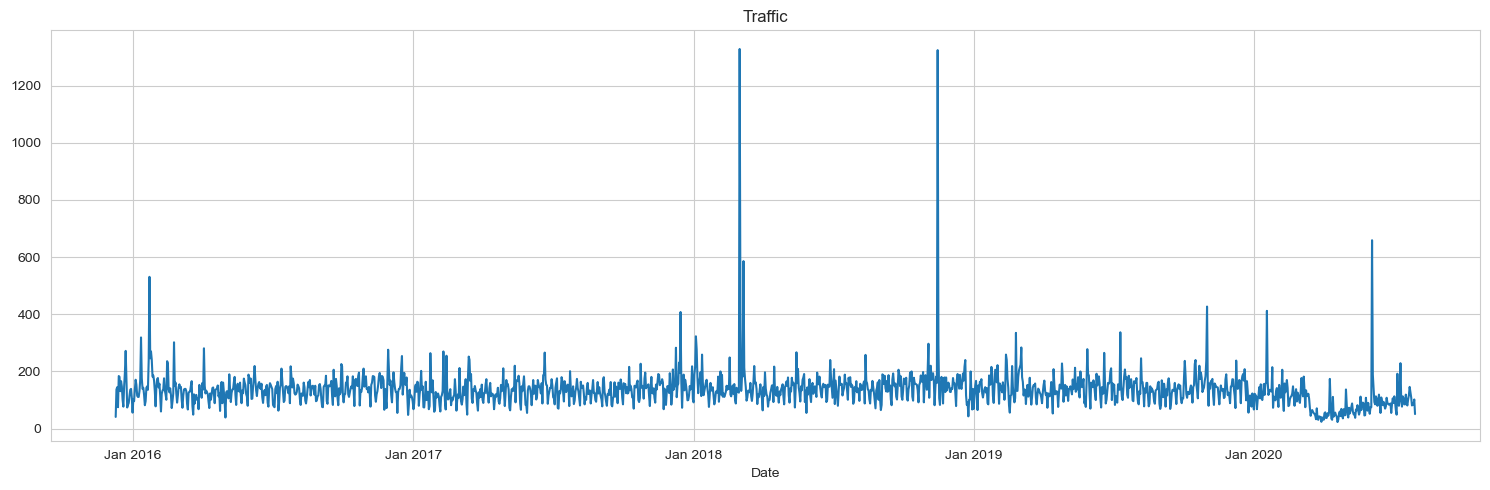

In [178]:
fig, axis = plt.subplots(figsize=(15,5))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

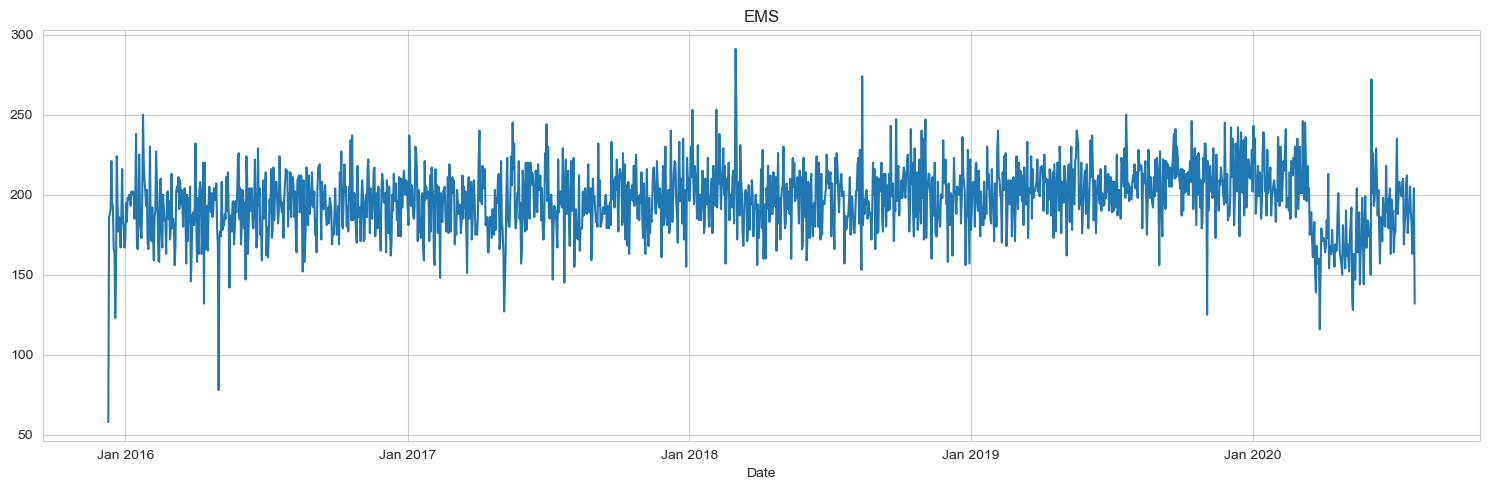

In [180]:
fig, axis = plt.subplots(figsize=(15,5))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

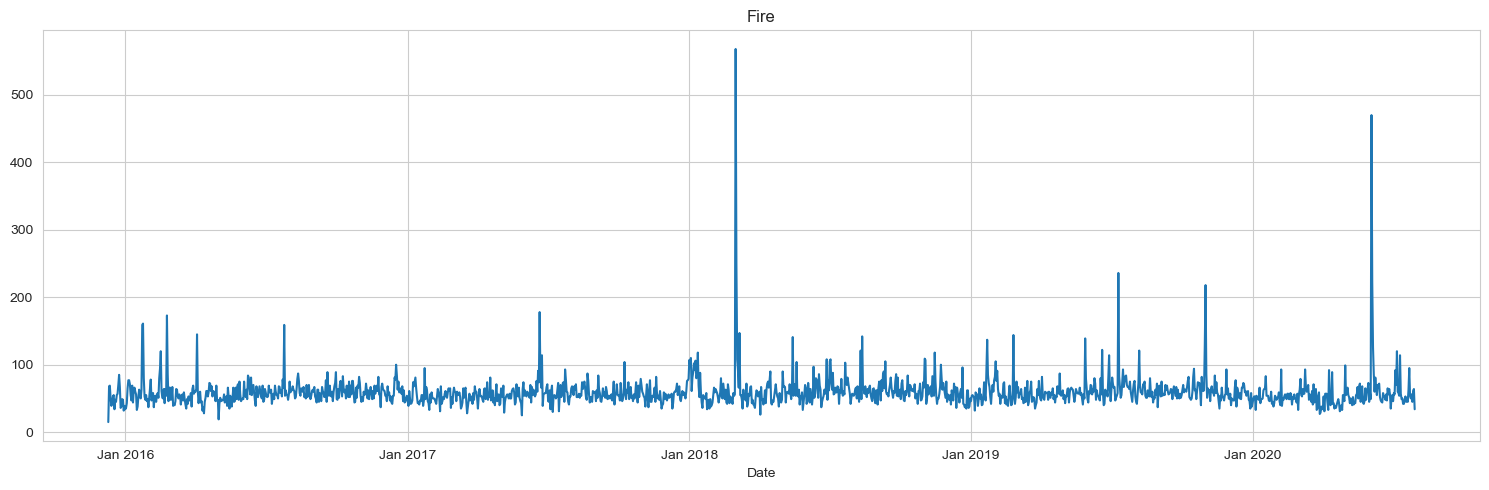

In [182]:
fig, axis = plt.subplots(figsize=(15,5))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

#### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method.

In [189]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,5584,5843,5994,6181,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,5458,5632,5881,5664,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,4944,5450,5555,5378,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,4262,4438,4882,4654,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,5464,5492,5898,6173,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Figure size 1500x600 with 0 Axes>

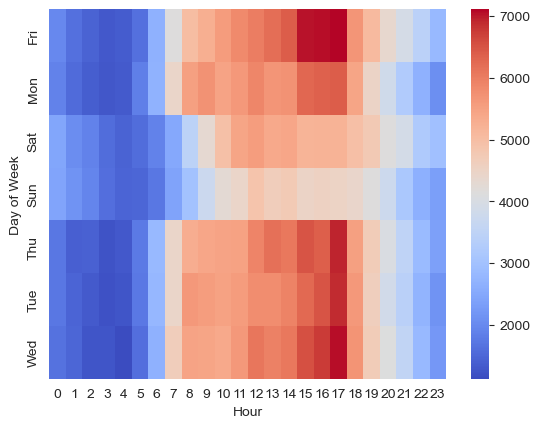

<Figure size 1500x600 with 0 Axes>

In [195]:
sns.heatmap(dayHour, cmap='coolwarm')
plt.figure(figsize=(15,6))

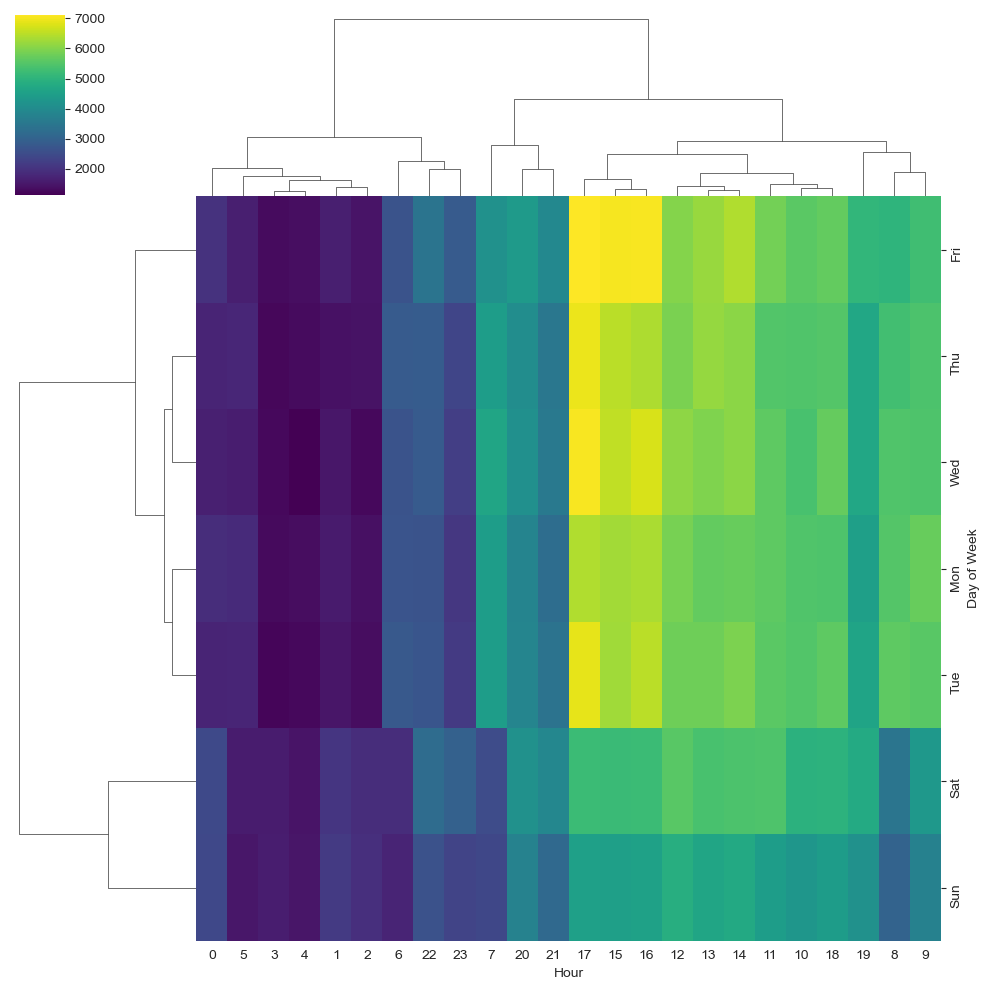

In [197]:
sns.clustermap(dayHour,cmap='viridis')

## Now repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [202]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<Axes: xlabel='Month', ylabel='Day of Week'>

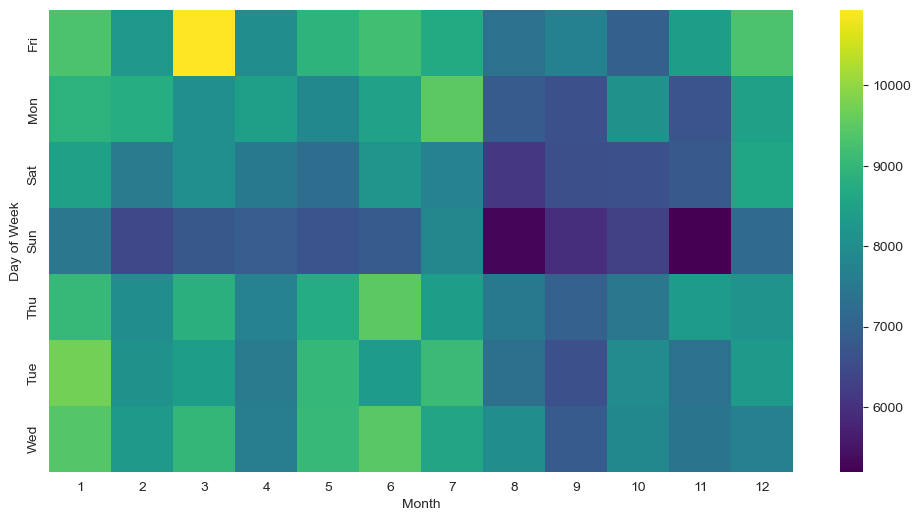

In [204]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

# Overall Insights

**Temporal Trends:**
There are clear temporal patterns in the data, such as peak hours for calls and specific days or months with higher call volumes.


**Spatial Distribution:**
Certain zip codes and townships have higher frequencies of emergency calls, which could be due to higher population density, socioeconomic factors, or local issues.


**Type of Emergencies:**
EMS-related calls are the most frequent, indicating a significant need for medical emergency services.


**Resource Allocation:**
Understanding these patterns can help emergency services allocate resources more effectively, plan for peak times, and address specific community needs.


* These insights can help in improving the efficiency and effectiveness of emergency response services by focusing on areas and times with higher demand and understanding the nature of emergencies better.